Artificial Neural Network

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/mobile_price_classification.csv')
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   2000 non-null   int64  
 1   bluetooth       2000 non-null   int64  
 2   clock_speed     2000 non-null   float64
 3   dual_sim        2000 non-null   int64  
 4   front_cam       2000 non-null   int64  
 5   4G              2000 non-null   int64  
 6   int_memory      2000 non-null   int64  
 7   m_dep           2000 non-null   float64
 8   mobile_wt       2000 non-null   int64  
 9   n_cores         2000 non-null   int64  
 10  primary_camera  2000 non-null   int64  
 11  px_height       2000 non-null   int64  
 12  px_width        2000 non-null   int64  
 13  ram             2000 non-null   int64  
 14  sc_h            2000 non-null   int64  
 15  sc_w            2000 non-null   int64  
 16  talk_time       2000 non-null   int64  
 17  three_g         2000 non-null   i

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df['battery_power'] = sc.fit_transform(df[['battery_power']])
df['clock_speed'] = sc.fit_transform(df[['clock_speed']])
df['int_memory'] = sc.fit_transform(df[['int_memory']])
df['mobile_wt'] = sc.fit_transform(df[['mobile_wt']])
df['px_height'] = sc.fit_transform(df[['px_height']])
df['px_width'] = sc.fit_transform(df[['px_width']])
df['ram'] = sc.fit_transform(df[['ram']])

In [5]:
data = df.drop('price_range',axis=1)
label = df.price_range

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.25, random_state=42)

In [7]:
X_train.shape

(1500, 20)

In [8]:
from keras.models import Sequential
from keras.layers import Dense

In [9]:
model = Sequential()

model.add(Dense(10,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [10]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
47/47 [==============================] - 1s 2ms/step - loss: 2.2043 - accuracy: 0.2320
Epoch 2/100
47/47 [==============================] - 0s 2ms/step - loss: 1.8995 - accuracy: 0.2387
Epoch 3/100
47/47 [==============================] - 0s 2ms/step - loss: 1.7081 - accuracy: 0.2367
Epoch 4/100
47/47 [==============================] - 0s 2ms/step - loss: 1.5847 - accuracy: 0.2460
Epoch 5/100
47/47 [==============================] - 0s 2ms/step - loss: 1.5094 - accuracy: 0.2673
Epoch 6/100
47/47 [==============================] - 0s 2ms/step - loss: 1.4625 - accuracy: 0.2747
Epoch 7/100
47/47 [==============================] - 0s 2ms/step - loss: 1.4298 - accuracy: 0.2840
Epoch 8/100
47/47 [==============================] - 0s 2ms/step - loss: 1.4070 - accuracy: 0.2900
Epoch 9/100
47/47 [==============================] - 0s 2ms/step - loss: 1.3884 - accuracy: 0.3007
Epoch 10/100
47/47 [==============================] - 0s 2ms/step - loss: 1.3737 - accuracy: 0.3067
Epoch 11/

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                210       
                                                                 
 dense_1 (Dense)             (None, 4)                 44        
                                                                 
Total params: 254
Trainable params: 254
Non-trainable params: 0
_________________________________________________________________


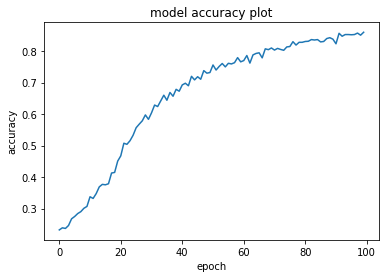

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('model accuracy plot')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

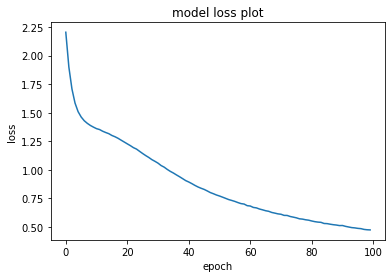

In [14]:
plt.plot(history.history['loss'])
plt.title('model loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()